# Data preparation

In [1]:
import numpy as np
import pandas as pd

In [2]:
xVar = []
yVar = []

for k in range(0, 500):
    x = k + 15
    xVar.append(x + np.random.normal(loc=0.0, scale = 4))
    yVar.append(x * 1.5 + np.random.normal(loc=0.0, scale=6))

regrData = pd.DataFrame(list(zip(xVar, yVar)), columns=['X', 'Y'])
regrData

,X,Y
0,10.374912,19.081020
1,19.039636,14.549363
2,15.521030,22.277417
3,16.561458,29.416620
4,16.584184,26.611369
...,...,...
495,511.712432,762.021146
496,513.798914,763.362677
497,516.356161,769.994037
498,518.578324,783.717415


# Model Analysis

In [3]:
import statsmodels.formula.api as smf

- Model training and prediction

In [4]:
regrModel = smf.ols(formula="Y ~ X", data=regrData).fit()
regrData["yPred"] = regrModel.predict() # Predict new data on the data which the model was trained on.

- Create residuals from the target data (*Y*) and the predicted data (*yPred*)

In [5]:
regrData["residual"] = regrData["Y"] - regrData["yPred"]
stdRes = regrData["residual"].std()
regrData["standardRes"] = regrData["residual"] / stdRes
regrData

,X,Y,yPred,residual,standardRes
0,10.374912,19.081020,15.054653,4.026367,0.473086
1,19.039636,14.549363,28.074952,-13.525589,-1.589216
2,15.521030,22.277417,22.787616,-0.510199,-0.059947
3,16.561458,29.416620,24.351045,5.065575,0.595190
4,16.584184,26.611369,24.385195,2.226173,0.261569
...,...,...,...,...,...
495,511.712432,762.021146,768.403962,-6.382816,-0.749962
496,513.798914,763.362677,771.539274,-8.176597,-0.960726
497,516.356161,769.994037,775.381995,-5.387958,-0.633069
498,518.578324,783.717415,778.721193,4.996222,0.587041


## Plotting

In [6]:
import matplotlib.pyplot as plt

- histogram of residuals


- residual spread vs independent variable

- residual spread vs dependent variable

- standardised residual spread vs independent variable

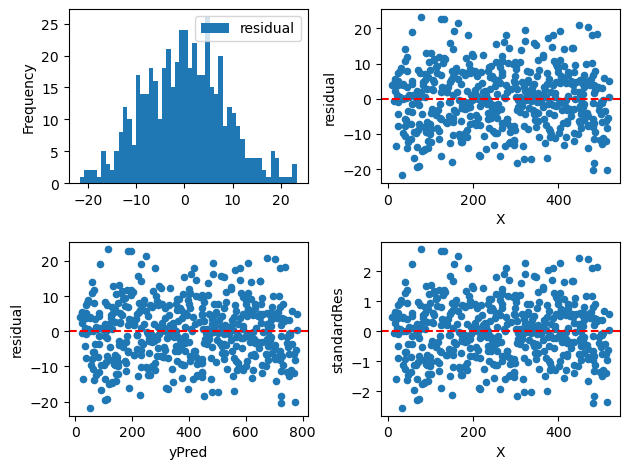

In [7]:
fig, ((hist1, resX2), (resY3, sresX4)) = plt.subplots(2, 2)
regrData.plot(kind="hist", y="residual", bins=50, ax=hist1)
regrData.plot(kind="scatter", x="X", y="residual", ax=resX2)
resX2.axhline(y=0.0, c="red", linestyle="dashed")
regrData.plot(kind="scatter", x="yPred", y="residual", ax=resY3)
resY3.axhline(y=0.0, c="red", linestyle="dashed")
regrData.plot(kind="scatter", x="X", y="standardRes", ax=sresX4)
sresX4.axhline(y=0.0, c="red", linestyle="dashed")
fig.tight_layout()
plt.show()

A good exercise is to check how these spreads change with different data sizes - the `range()` limits.

## Parameters and diagnostic summaries

In [8]:
regrModel.params

Intercept   -0.535508
X            1.502679
dtype: float64

In [9]:
print(regrModel.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.231e+05
Date:                Thu, 21 Aug 2025   Prob (F-statistic):               0.00
Time:                        06:45:56   Log-Likelihood:                -1779.6
No. Observations:                 500   AIC:                             3563.
Df Residuals:                     498   BIC:                             3572.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5355      0.796     -0.673      0.5

https://www.geeksforgeeks.org/machine-learning/interpreting-the-results-of-linear-regression-using-ols-summary/